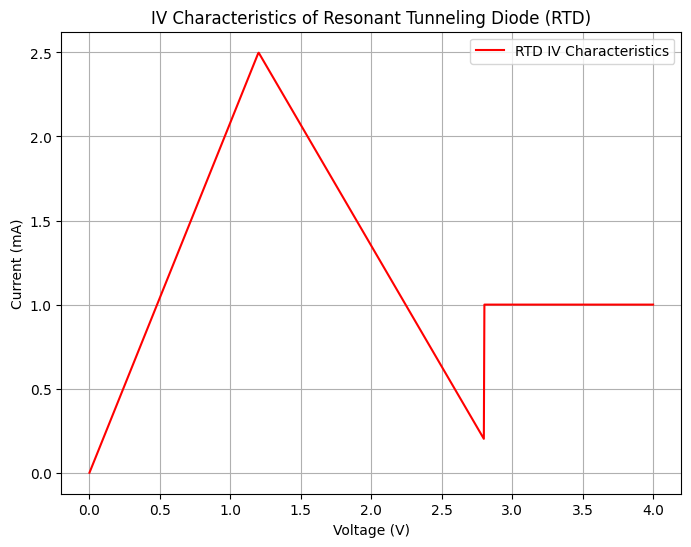

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the voltage range (0 to 4V)
voltage = np.linspace(0, 4, 1000)  # 1000 points between 0 and 4V

# Define the IV characteristics based on your measured data
def rtd_current(voltage):
    I_peak = 2.5  # Peak current (mA)
    V_peak = 1.2  # Voltage at peak current (V)
    V_valley = 2.8  # Voltage at valley (V)
    I_valley = 0.2  # Valley current (mA)
    I_saturation = 1.0  # Saturation current after valley (mA)

    current = np.zeros_like(voltage)

    for i, V in enumerate(voltage):
        if V <= V_peak:
            # Before the peak, the current rises
            current[i] = I_peak * (V / V_peak)
        elif V <= V_valley:
            # Between the peak and the valley, the current decreases (NDR region)
            current[i] = I_peak - (I_peak - I_valley) * ((V - V_peak) / (V_valley - V_peak))
        else:
            # After the valley, the current stabilizes at the saturation current
            current[i] = I_saturation
    return current

# Calculate the current for the RTD based on the voltage
current_rtd = rtd_current(voltage)

# Plot the IV characteristics
plt.figure(figsize=(8, 6))
plt.plot(voltage, current_rtd, label='RTD IV Characteristics', color='red')

# Add labels and title
plt.title('IV Characteristics of Resonant Tunneling Diode (RTD)')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
